**Veri Yükleme ve Ön İşlemler**

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Veri setini yükleme
file_path = 'veri-seti.txt'
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(file_path, delimiter='\t', header=None, names=column_names)

# Eksik değerlerin yerini doldurma (0 değerlerini ortalama ile değiştirme)
data['Insulin'].replace(0, data['Insulin'].mean(), inplace=True)
data['SkinThickness'].replace(0, data['SkinThickness'].mean(), inplace=True)
data['Glucose'].replace(0, data['Glucose'].mean(), inplace=True)
data['BloodPressure'].replace(0, data['BloodPressure'].mean(), inplace=True)
data['BMI'].replace(0, data['BMI'].mean(), inplace=True)

# İlk birkaç satırı gözlemleyelim
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Veriyi Eğitim ve Test Olarak Ayırma**

In [5]:
from sklearn.model_selection import train_test_split

# Veri setini özellikler ve hedef değişken olarak ayırma
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 537
Test set size: 231


**MLP Modeli ve Raporlanması**

MLP Accuracy: 0.74
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

MLP Confusion Matrix:
 [[121  30]
 [ 31  49]]
MLP ROC AUC: 0.79
MLP Sensitivity: 0.61
MLP Specificity: 0.80


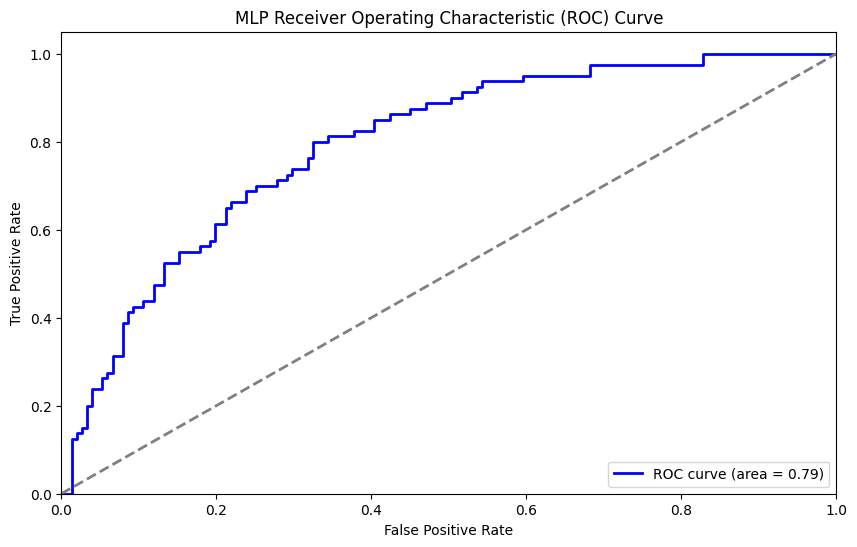

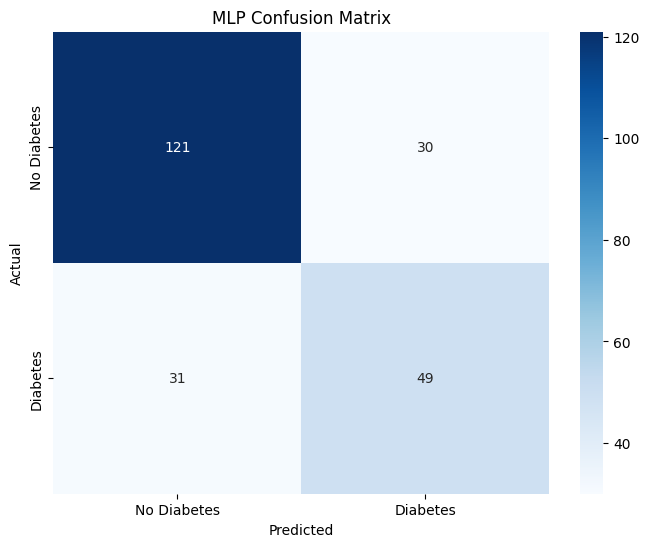

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Modeli eğitimi
mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train_scaled, y_train)

# Tahminleri elde etme
y_pred_mlp = mlp.predict(X_test_scaled)
y_pred_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]  # ROC eğrisi için olasılık değerleri

# Doğruluk
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp:.2f}")

# Sınıflandırma Raporu
class_report_mlp = classification_report(y_test, y_pred_mlp)
print("MLP Classification Report:\n", class_report_mlp)

# Karışıklık Matrisi
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("MLP Confusion Matrix:\n", conf_matrix_mlp)

# ROC Eğrisi ve AUC
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)
print(f"MLP ROC AUC: {roc_auc_mlp:.2f}")

# Sensitivity (Recall) ve Specificity
tn_mlp, fp_mlp, fn_mlp, tp_mlp = conf_matrix_mlp.ravel()
sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp)
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)
print(f"MLP Sensitivity: {sensitivity_mlp:.2f}")
print(f"MLP Specificity: {specificity_mlp:.2f}")

# ROC Eğrisi Çizimi
plt.figure(figsize=(10, 6))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Karışıklık Matrisini Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()


**SVM Modeli ve Raporlanması**

SVM Accuracy: 0.74
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

SVM Confusion Matrix:
 [[126  25]
 [ 34  46]]
SVM ROC AUC: 0.80
SVM Sensitivity: 0.57
SVM Specificity: 0.83


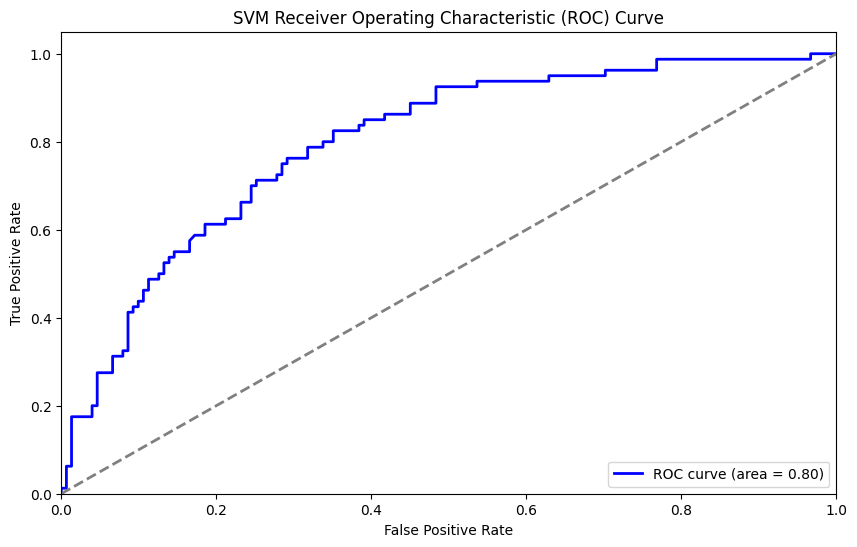

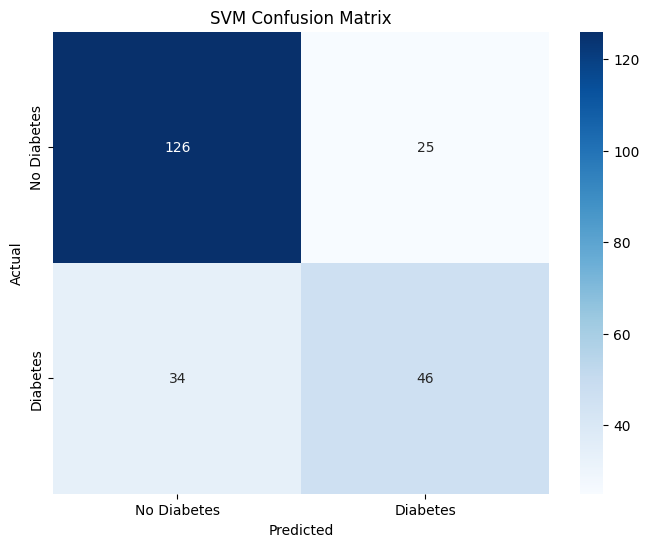

In [7]:
from sklearn.svm import SVC

# SVM Modeli eğitimi
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Tahminleri elde etme
y_pred_svm = svm.predict(X_test_scaled)
y_pred_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]  # ROC eğrisi için olasılık değerleri

# Doğruluk
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Sınıflandırma Raporu
class_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", class_report_svm)

# Karışıklık Matrisi
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)

# ROC Eğrisi ve AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f"SVM ROC AUC: {roc_auc_svm:.2f}")

# Sensitivity (Recall) ve Specificity
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)
print(f"SVM Sensitivity: {sensitivity_svm:.2f}")
print(f"SVM Specificity: {specificity_svm:.2f}")

# ROC Eğrisi Çizimi
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Karışıklık Matrisini Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()
